<a href="https://colab.research.google.com/github/TirendazAcademy/NLP-with-Transformers/blob/main/Twitter%20Sentiment%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Perform a Twitter Sentiment Analysis with Snscrape and Hugging Face

What do football lovers think about the FIFA World Cup 2022? To find out that, I'll perform a Twitter sentiment analysis using the hashtag #WorldCup2022 on Twitter. Here are what I'll cover in this blog:

- What is Sentiment Analysis?
- What is Social Media Scraping?
- How to scrape with Snscrape?
- How to perform Twitter sentiment analysis?

Let's get started!

# How to scrape with snscrape?

First, let's take a look at how to scrape the tweets with Snscrape.

In [1]:
!pip install snscrape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 4.7 MB/s 


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

# Created a list to append all tweet attributes(data)
tweets = []

query = '#WorldCup2022 lang:en since:2022-11-21 until:2022-12-04'
q = sntwitter.TwitterSearchScraper(query)

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(q.get_items()):
    if i>100:
        break
    tweets.append([tweet.user.username, tweet.date, tweet.likeCount, tweet.sourceLabel, tweet.content])
tweets_df = pd.DataFrame(tweets, columns=["User", "Date Created", "Number of Likes", "Source of Tweet", "Tweet"])
tweets_df.head()

,User,Date Created,Number of Likes,Source of Tweet,Tweet
0,ontherichcoast,2022-12-03 23:59:54+00:00,1,Twitter for iPhone,The mistake is to vote ...? \n\n#NigeriaDecide...
1,OnlySiddhartha,2022-12-03 23:59:53+00:00,2,Twitter for Android,"@ToshibaTVGlobal I prefer sports Mode, because..."
2,binbo114,2022-12-03 23:59:30+00:00,0,Twitter for iPhone,Who are you rooting for ?\n#ArgentinavsAustral...
3,EInthemorning,2022-12-03 23:59:17+00:00,1,Twitter for Android,"You gotta love Dutch football, calm, cool, cal..."
4,footballitalia,2022-12-03 23:59:13+00:00,13,TweetDeck,Sunday's Italian #Calcio headlines in English ...


# Twitter Sentiment Analysis with Hugging Face

Let's import the model we'll use for Twitter sentiment analysis.

In [3]:
!pip install transformers
from transformers import pipeline
sentiment_analysis = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.8 MB 31.4 MB/s 
     |████████████████████████████████| 7.6 MB 54.9 MB/s 
     |████████████████████████████████| 182 kB 81.2 MB/s 


Downloading:   0%|          | 0.00/890 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/540M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/295 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/843k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


After that let's find out the sentiment in each tweet with the for loop.

In [4]:
tweets = []
for i,tweet in enumerate(q.get_items()):
    if i>100:
        break
    content = tweet.content
    sentiment = sentiment_analysis(content)
    tweets.append({'tweet': content, 'sentiment': sentiment[0]['label']})

Let's convert data into a dataframe.

In [5]:
import pandas as pd
pd.set_option('max_colwidth', None)

# Converting data to dataframe
df = pd.DataFrame(tweets)
df.head()

,tweet,sentiment
0,The mistake is to vote ...? \n\n#NigeriaDecides2023 #Nigeria #Pele #Messi𓃵 #WorldCup2022,NEG
1,"@ToshibaTVGlobal I prefer sports Mode, because it gives me best experience of watching \n #HomeEntertainment \n#WorldCup2022 #ToshibaTV\n@ToshibaTVGlobal\n\nTagging \n@dayalojha_ \n@Sanjiv_34 \n@iam_margam \n@sandeep_447 \n@Chinnarayudu98\n@Sagar14Naik\n@pari0275\n@blessedkamal",POS
2,Who are you rooting for ?\n#ArgentinavsAustralia \n#NetherlandsvsUSA \n#WorldCup2022 https://t.co/UgKqvozlMH,NEU
3,"You gotta love Dutch football, calm, cool, calculated and deadly. #WorldCup2022",POS
4,Sunday's Italian #Calcio headlines in English https://t.co/EYj6yu7iDX #Juventus #CR7 #ACMilan #FCIM #Napoli #ASRoma #SerieA #SerieATIM #FIFAWorldCup #Qatar2022 #WorldCup2022 #ARGAUS #NEDUSA https://t.co/pxA4pryCrv,NEU


# Data Visualization

First, let's count the number of tweets by sentiments.

In [6]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

sentiment
NEG    24
NEU    43
POS    34
dtype: int64


Now let's draw a pie plot for the sentiments.

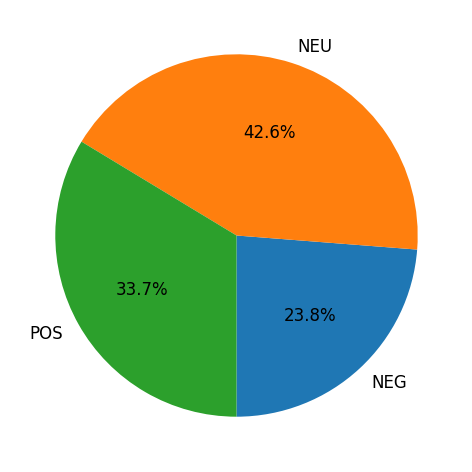

In [7]:
# Let's visualize the sentiments
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.subplot(111)
sentiment_counts.plot.pie(ax=ax, autopct='%1.1f%%', startangle=270, fontsize=12, label="")

Let's create a world cloud with positive tweets.

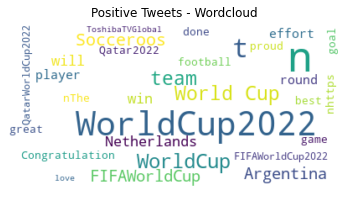

In [8]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

# Wordcloud with positive tweets
positive_tweets = df['tweet'][df["sentiment"] == 'POS']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets - Wordcloud")
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, let's create a world cloud with positive tweets.

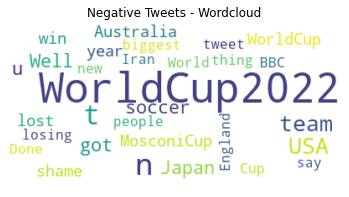

In [9]:
# Wordcloud with negative tweets
negative_tweets = df['tweet'][df["sentiment"] == 'NEG']
stop_words = ["https", "co", "RT"] + list(STOPWORDS)
negative_wordcloud = WordCloud(max_font_size=50, max_words=30, background_color="white", stopwords = stop_words).generate(str(negative_tweets))
plt.figure()
plt.title("Negative Tweets - Wordcloud")
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

That's it. Thanks for reading. I hope you enjoy it. You can find the notebook I used on this blog here. Don't forget to follow us on [YouTube](https://youtube.com/tirendazacademy) | [Twitter](https://twitter.com/TirendazAcademy) | [Instagram](https://www.instagram.com/tirendazacademy/) | [TikTok](https://www.tiktok.com/@tirendazacademy) 👍